In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy import stats
import pandas as pd

In [126]:
def plot_GMM(X, n_components=5, bins=60):
    # fit models with 1-10 components
    N = np.arange(1, n_components+1)
    x = np.arange(0, len(X)).reshape(-1, 1)

    models = [None for i in range(len(N))]
    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    # Compute the best model
    M_best = models[np.argmin(AIC)]
    MU = [M_best.means_.flatten()]
    SIGMA = [np.sqrt(M_best.covariances_.flatten())]
    W = [M_best.weights_.flatten()]

    # Plot the results
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    x = np.linspace(min(X), max(X), 1000)
    pdf = np.exp(M_best.score_samples(x.reshape(-1, 1)))

    ax[0].hist(X, bins=bins, density=True, alpha=0.5, label='Data')
    ax[0].plot(x, pdf, '-k', label='Best fit')
    for i in range(M_best.n_components):
        ax[0].plot(x, W[0][i]*stats.norm.pdf(x, MU[0][i], SIGMA[0][i]), label='Gaussian {}'.format(i+1), ls='--')
    # ax[0].legend()

    ax[1].plot(N, AIC, '-k', label='AIC')
    ax[1].plot(N, BIC, '--k', label='BIC')
    ax[1].set_xlabel('n. components')
    ax[1].set_ylabel('information criterion')
    ax[1].legend()

    plt.show()

    return M_best

## PJME Dataset


(145366, 2)


<AxesSubplot: >

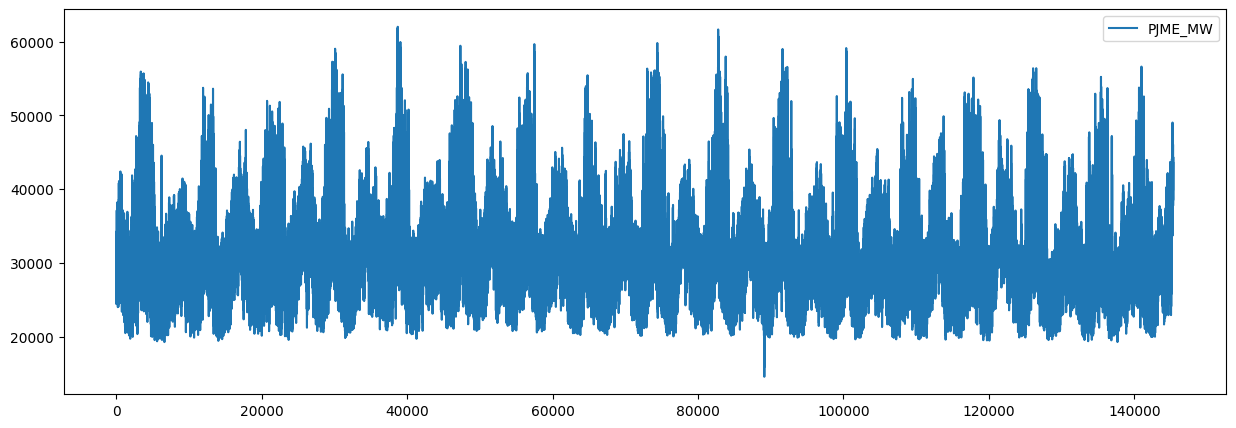

In [106]:
df = pd.read_csv('datasets/PJME_hourly.csv')
print(df.shape)
df.plot(figsize=(15, 5))

(8640, 1)

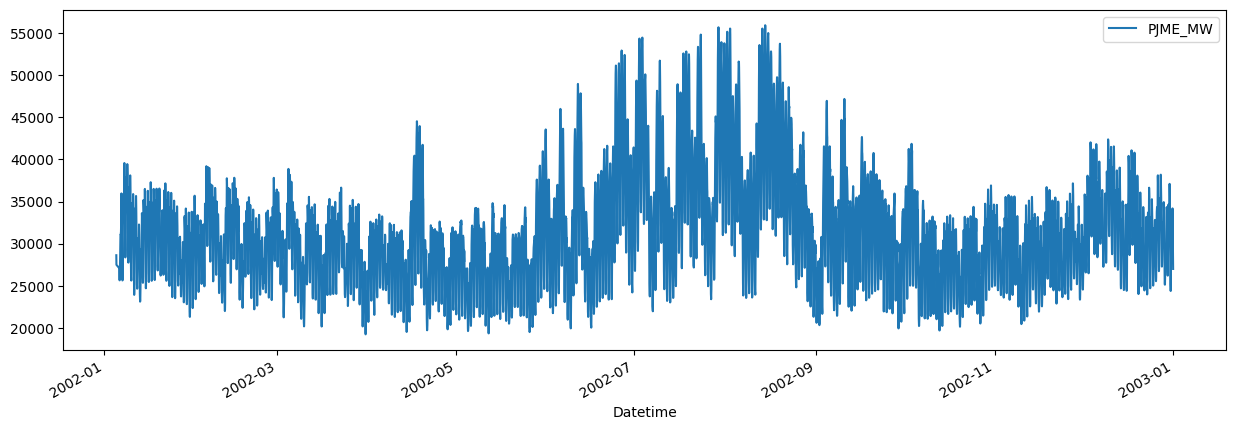

In [107]:
df = df[:24*30*12]
df.set_index('Datetime', inplace=True)
df.index = pd.to_datetime(df.index)
df.plot(figsize=(15, 5))
df.shape

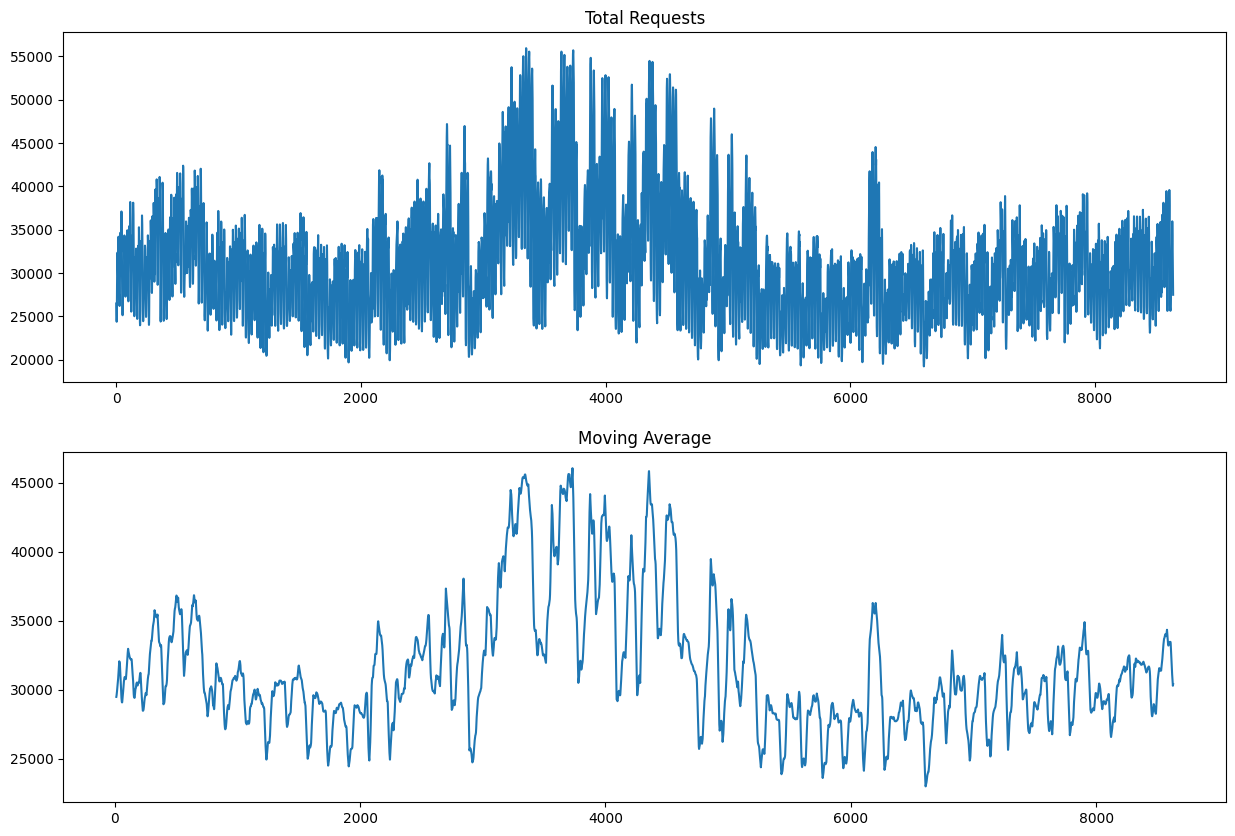

In [108]:
vals = df['PJME_MW'].values
time = np.arange(0, len(vals)).reshape(-1, 1)
vals_mov_avg = np.convolve(vals, np.ones(24)/24, mode='valid').reshape(-1, 1)
time_mov_avg = time[12:-11]

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(time, vals)
ax[0].set_title('Total Requests')
ax[1].plot(time_mov_avg, vals_mov_avg)
ax[1].set_title('Moving Average')
plt.show()

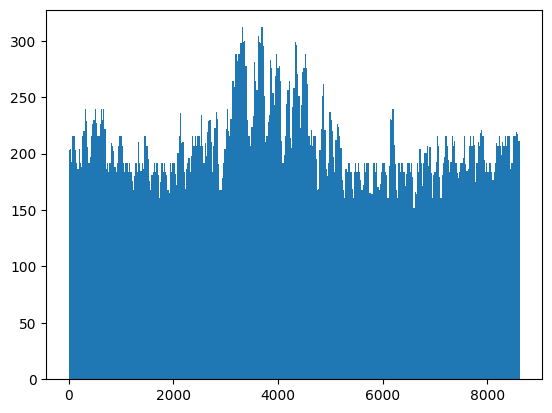

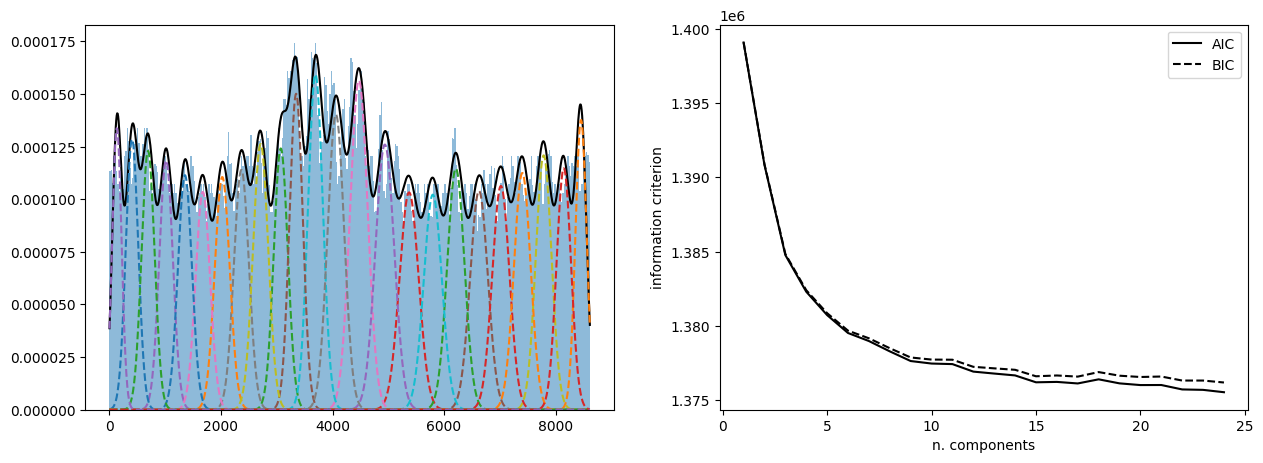

GaussianMixture(n_components=24)

In [109]:
scale = vals_mov_avg.sum() / 80000
h = np.concatenate([np.full((int(vals_mov_avg[i][0] // scale), 1), i) for i in range(len(vals_mov_avg))])

plt.hist(h.flatten(), bins=365)
plt.show()

plot_GMM(h, 24, 365)
